In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense ,BatchNormalization,Input,ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras import models , optimizers , regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

## Obtain the information

In [2]:
# Train dataframe
df_train = pd.read_csv('/kaggle/input/ai-vs-human-generated-dataset/train.csv')

In [74]:
#Test dataframe
df_test = pd.read_csv('/kaggle/input/ai-vs-human-generated-dataset/test.csv')

In [75]:
df_test

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg
...,...
5535,test_data_v2/483412064ff74d9d9472d606b65976d9.jpg
5536,test_data_v2/c0b49ba4081a4197b422dac7c15aea7f.jpg
5537,test_data_v2/01454aaedec140c0a3ca1f48028c41cf.jpg
5538,test_data_v2/e9adfea8b67e4791968c4c2bdd8ec343.jpg


# Clean data

In [ ]:
df_train

In [4]:
# delete Unnamed column
df_train.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#check if there are empty rows
df_train.isna().sum()

In [5]:
#check if thera are duplicated rows
df_train.duplicated().sum()

0

## Exploratory Data

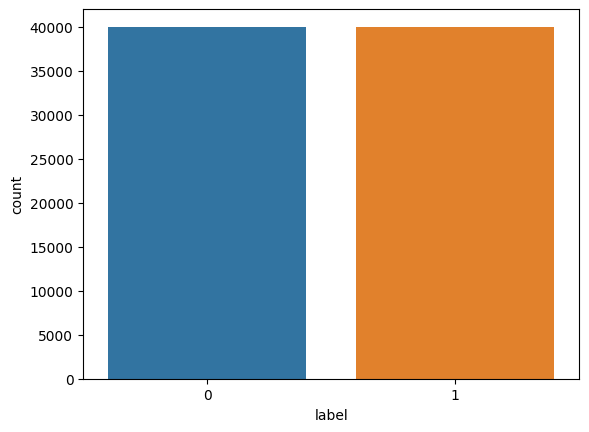

In [6]:
# Watch how is divide the data

sns.countplot(data=df_train , x='label')
plt.show()

In [ ]:
df_train['file_name'][0]

In [ ]:
Image.open('/kaggle/input/ai-vs-human-generated-dataset/'+df_train['file_name'][0])

In [ ]:
#label 1 -> AI Image
#label 0 -> Human Image
df_train['label'][0]

In [7]:
df_train.dtypes

file_name    object
label         int64
dtype: object

## Separete data

In [8]:
import shutil
import os

In [9]:
location_AI = '/kaggle/working/Train_data/AI_Images'
location_Hum = '/kaggle/working/Train_data/Human_Images'

In [10]:
# Crear la carpeta si no existe
os.makedirs(location_AI, exist_ok=True)
os.makedirs(location_Hum, exist_ok=True)

In [11]:
# Separete de images depends of the label

for index , row in df_train.iterrows():
    if row['label'] == 1:
        origin_path = '/kaggle/input/ai-vs-human-generated-dataset/'+ row['file_name']
        dest_path = os.path.join(location_AI,os.path.basename(origin_path))

        # move the to the new carpet
        shutil.copy(origin_path,dest_path)

    else:
        origin_path = '/kaggle/input/ai-vs-human-generated-dataset/' + row['file_name']
        dest_path = os.path.join(location_Hum,os.path.basename(origin_path))

        # move the to the new carpet
        shutil.copy(origin_path,dest_path)
        


        

## Get data and data Argumentation

In [12]:
# data Argumentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3
    )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_dir = '/kaggle/working/Train_data'

In [31]:
test_dir = '/kaggle/input/ai-vs-human-generated-dataset/test_data_v2'

In [ ]:
#Reset train data generator
train_generator.reset()

In [14]:
# Get data 

train_generator = train_datagen.flow_from_directory(train_dir,
                                 target_size=(28,28),
                                 batch_size=64,
                                 class_mode='binary',
                                 color_mode='grayscale',
                                 
                                 subset = "training" 

                                 )

validation_generator = train_datagen.flow_from_directory(train_dir,
                                 target_size=(28,28),
                                 batch_size=64,
                                 class_mode='binary',
                                 color_mode='grayscale',
                                 subset = "validation"
                                 )

Found 55966 images belonging to 2 classes.
Found 23984 images belonging to 2 classes.


In [39]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(28,28),
                                                  batch_size=64,
                                                  class_mode='binary',
                                                  color_mode='grayscale',
                                                  
                                                 )

Found 0 images belonging to 0 classes.


In [33]:
len(test_generator)

0

In [15]:
train_generator[0][0].shape

(64, 28, 28, 1)

# Divide validation_generetaor data 

- 15 % -> validation
- 15 % -> test

In [16]:
len(validation_generator)

375

In [17]:
# Extract de batches in x_val y y_val from validation_generator
x_val = []
y_val = []
num_batches = len(validation_generator)
for i in range(num_batches):
    batch = validation_generator[i]
    images, labels = batch
    x_val.append(images)
    y_val.append(labels)

x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)




In [18]:
print(f"X_train shape: {len(x_val)}")
print(f"y_train shape: {len(y_val)}")

X_train shape: 23984
y_train shape: 23984


In [19]:
# Take 50 % of x_val and  y_val to x_test and y_test

x_test = x_val[:11992]
y_test = y_val[:11992]

x_val = x_val[11992:]
y_val = y_val[11992:]

In [20]:
print(f"x_test shape: {len(x_test)}")
print(f"y_test shape: {len(y_test)}")
print(f"x_val shape: {len(x_val)}")
print(f"y_val shape: {len(y_val)}")

x_test shape: 11992
y_test shape: 11992
x_val shape: 11992
y_val shape: 11992


##  Model

In [46]:
def model1 ():

    model = models.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),

   
    Conv2D(64,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    
    Conv2D(128,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

   
    Conv2D(256,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Flatten(),

    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
    ])

    return model

## Callback definition

In [47]:
checkpoint = ModelCheckpoint('best_wights.keras',monitor='val_accuracy', verbose= 1, save_best_only=True)

## Compilation

In [48]:
model_1 = model1()

In [49]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training

In [ ]:
len(train_generator)

In [50]:
hist = model_1.fit(train_generator,
                  steps_per_epoch=55966//64,
                  epochs=30,
                  validation_data=(x_val,y_val),
                  
                  callbacks=[checkpoint])

Epoch 1/30
868/874 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.7845 - loss: 0.4965
Epoch 1: val_accuracy improved from -inf to 0.84031, saving model to best_wights.keras
874/874 ━━━━━━━━━━━━━━━━━━━━ 166s 180ms/step - accuracy: 0.7847 - loss: 0.4961 - val_accuracy: 0.8403 - val_loss: 0.3808
Epoch 2/30
  1/874 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8750 - loss: 0.4157

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.84031 to 0.84073, saving model to best_wights.keras
874/874 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.8750 - loss: 0.4157 - val_accuracy: 0.8407 - val_loss: 0.3844
Epoch 3/30
868/874 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.8254 - loss: 0.4078
Epoch 3: val_accuracy did not improve from 0.84073
874/874 ━━━━━━━━━━━━━━━━━━━━ 150s 170ms/step - accuracy: 0.8254 - loss: 0.4077 - val_accuracy: 0.7894 - val_loss: 0.4427
Epoch 4/30
  1/874 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7656 - loss: 0.4631
Epoch 4: val_accuracy did not improve from 0.84073
874/874 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.7656 - loss: 0.4631 - val_accuracy: 0.7844 - val_loss: 0.4470
Epoch 5/30
868/874 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.8341 - loss: 0.3921
Epoch 5: val_accuracy did not improve from 0.84073
874/874 ━━━━━━━━━━━━━━━━━━━━ 151s 171ms/step - accuracy: 0.8342 - loss: 0.3921 - val_accuracy: 0.8244 - val_loss: 0.3857
Epoch 6/30
  1

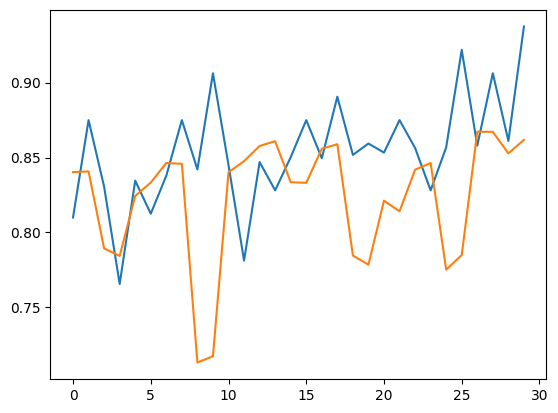

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

### Take the best weights to ather model

In [52]:
model_best = model_1

In [53]:
model_best.load_weights('best_wights.keras')

In [54]:
model_best.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model_best.evaluate(x_test,y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8576 - loss: 0.3438


[0.3366142511367798, 0.8589059114456177]

# Prediction

In [56]:
y_pred = model_best.predict(x_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [63]:
y_pred = y_pred.flatten()

In [65]:
y_pred = np.where(y_pred>0.5,1,0)

In [66]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

# Get F1 Score

In [67]:
from sklearn.metrics import f1_score

In [70]:
# Calcular F1-score
f1 = f1_score(y_test, y_pred)

print(f"F1-score: {f1:.2f}")

F1-score: 0.87


# Get test data

In [ ]:
test_dir ="/kaggle/input/ai-vs-human-generated-dataset/test_data_v2"

In [77]:
df_test.rename(columns={'id':'images'},inplace=True)

In [79]:
df_test['id'] = df_test.index

In [80]:
df_test

,images,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg,0
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg,1
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg,2
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg,3
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg,4
...,...,...
5535,test_data_v2/483412064ff74d9d9472d606b65976d9.jpg,5535
5536,test_data_v2/c0b49ba4081a4197b422dac7c15aea7f.jpg,5536
5537,test_data_v2/01454aaedec140c0a3ca1f48028c41cf.jpg,5537
5538,test_data_v2/e9adfea8b67e4791968c4c2bdd8ec343.jpg,5538


In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test
)